# Results for 'Evaluating the LENA System for Korean'

In [1]:
import os
import sys
import json

from evaluation import *

import pyannote.core.notebook
from pyannote.metrics.diarization import DiarizationErrorRate, IdentificationErrorRate
from pyannote.core import Segment, Annotation

import textgrid
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report

from collections import Counter

%matplotlib inline
sns.set()

In [2]:
def plot_confusion(confusion, norm=None, save=False):
    """ Plots a confusion matrix displaying one of precision, recall, and raw counts.
    """
    if norm == 'recall':
        normed_confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
        fmt = '.0%'
    elif norm == 'precision':
        normed_confusion = confusion.astype('float') / confusion.sum(axis=0)[np.newaxis, :]
        fmt = '.0%'
    else:
        normed_confusion = confusion
        fmt = 'd'
        
    normed_confusion = normed_confusion.fillna(0)

    fig = plt.figure(figsize=(8, 6))

    if norm == 'recall':
        plt.title('Recall', fontweight='bold', fontsize=15, pad=12)
        cmap = 'Purples'
    elif norm == 'precision':
        plt.title('Precision', fontweight='bold', fontsize=15, pad=12)
        cmap = 'Greens'
    else:
        plt.title('Confusion matrix')
        cmap = 'Reds'

    ax = sns.heatmap(normed_confusion, annot=True, fmt=fmt,  cbar=False, cmap=cmap)
    # ax = sns.heatmap(confusion, annot=True, xticklabels=labels, yticklabels=labels, cbar=False, cmap="YlGnBu")
    # ax.set(xlabel='LENA', ylabel='Human')
    ax.set_ylabel('Human', labelpad=12, fontweight='bold')
    plt.yticks(np.arange(len(normed_confusion.index))+0.5, rotation=0, fontsize="10", va="center")
    ax.set_xlabel('LENA', labelpad=12, fontweight='bold')

    # ax.set_ylim([0,2])

    plt.show()

    if save:
        fig.savefig('results/{}.pdf'.format(norm), dpi=600, bbox_inches='tight')

    return normed_confusion


## Confusion matrices for main analysis

In [3]:
with open('mappings/ours_confusion.json') as f:
    mappings = json.load(f)
    overlap_classes = mappings['overlap']
    lena_to_ground_mappings = mappings['lena_to_ground_mappings']
    human_to_ground_mappings = mappings['human_to_ground_mappings']
    human_order = mappings['human_order']
    lena_order = mappings['lena_order']

y_lena, y_human = clip_to_frames_all(lena_to_ground_mappings, human_to_ground_mappings, overlap_classes)

categorical_human = pd.Categorical(y_human, categories=human_order)
categorical_lena = pd.Categorical(y_lena, categories=lena_order)

cross_tabulation = pd.crosstab(categorical_human, categorical_lena)

# cross_tabulation = cross_tabulation.rename(index={'UnspecifiedOverlap': 'Other'})

Testing accuracy of e20190430_134500_031775.cha vs Clip1.TextGrid
Testing accuracy of e20181108_143031_012241.cha vs Clip2.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip3.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip4.TextGrid
Testing accuracy of e20190510_180618_031776.cha vs Clip5.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip6.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip7.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip8.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip9.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip10.TextGrid
Testing accuracy of e20190515_112523_031493.cha vs Clip11.TextGrid
Testing accuracy of e20181206_113635_012242.cha vs Clip12.TextGrid
Testing accuracy of e20181212_125908_012244.cha vs Clip13.TextGrid
Testing accuracy of e20181214_153936_014954.cha vs Clip14.TextGrid
Testing accuracy of e20181220_162750_012244.cha vs Clip15.TextGrid
Test

In [5]:
# Computed results
cross_tabulation = pd.read_csv('results/confusion_main.csv', index_col='row_0')
cross_tabulation

,Female,Male,Child,OtherChild,TV,Overlap,Noise,Silence
row_0,,,,,,,,
Female,345319,19052,154177,42363,3255,47025,2130,38126
Male,18349,32278,4242,1532,589,6938,457,13560
Child,5794,545,108611,7261,660,16503,1168,10920
OtherChild,1390,54,4401,5611,0,3348,24,1006
TV,6137,2838,10662,5739,14278,19490,4273,85073
Overlap,37375,8213,36570,7905,968,36659,2113,6453
Noise,12744,2972,18378,2205,637,43273,21607,87168
Silence,50660,6811,38043,11659,10252,7816,6615,297726


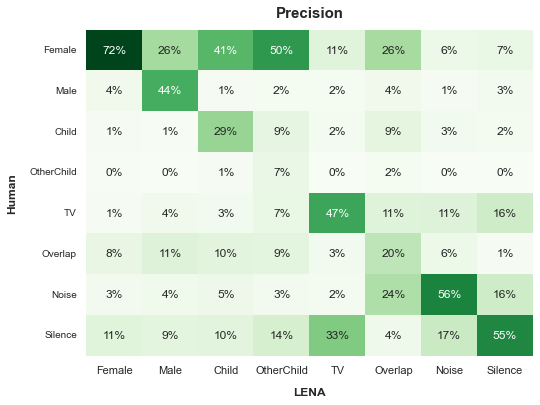

,Female,Male,Child,OtherChild,TV,Overlap,Noise,Silence
row_0,,,,,,,,
Female,0.722775,0.261836,0.411047,0.502676,0.106237,0.259732,0.055488,0.070600
Male,0.038406,0.443605,0.011309,0.018179,0.019224,0.038320,0.011905,0.025110
Child,0.012127,0.007490,0.289564,0.086158,0.021541,0.091151,0.030427,0.020221
OtherChild,0.002909,0.000742,0.011733,0.066580,0.000000,0.018492,0.000625,0.001863
TV,0.012845,0.039003,0.028426,0.068098,0.466007,0.107649,0.111314,0.157533
Overlap,0.078228,0.112873,0.097498,0.093800,0.031594,0.202478,0.055045,0.011949
Noise,0.026674,0.040845,0.048997,0.026164,0.020790,0.239009,0.562873,0.161413
Silence,0.106035,0.093605,0.101425,0.138345,0.334606,0.043170,0.172324,0.551312


In [10]:
plot_confusion(cross_tabulation, 'precision', True)

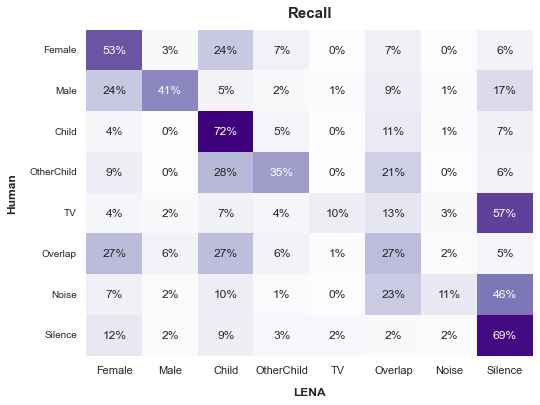

,Female,Male,Child,OtherChild,TV,Overlap,Noise,Silence
row_0,,,,,,,,
Female,0.530080,0.029246,0.236669,0.065029,0.004997,0.072185,0.003270,0.058525
Male,0.235410,0.414113,0.054423,0.019655,0.007557,0.089011,0.005863,0.173969
Child,0.038254,0.003598,0.717084,0.047939,0.004358,0.108958,0.007712,0.072097
OtherChild,0.087786,0.003410,0.277946,0.354364,0.000000,0.211444,0.001516,0.063534
TV,0.041329,0.019112,0.071803,0.038649,0.096155,0.131255,0.028776,0.572921
Overlap,0.274300,0.060276,0.268392,0.058016,0.007104,0.269045,0.015508,0.047359
Noise,0.067434,0.015726,0.097246,0.011668,0.003371,0.228977,0.114332,0.461245
Silence,0.117929,0.015855,0.088558,0.027140,0.023865,0.018194,0.015399,0.693060


In [11]:
plot_confusion(cross_tabulation, 'recall', True)

In [16]:
print(classification_report(y_human, y_lena, labels=human_order))

NameError: name 'y_human' is not defined

## Supplementary confusion

In [3]:
with open('mappings/cristia2020.json') as f:
    mappings = json.load(f)
    overlap_classes = mappings['overlap']
    lena_to_ground_mappings = mappings['lena_to_ground_mappings']
    human_to_ground_mappings = mappings['human_to_ground_mappings']
    human_order = mappings['human_order']
    lena_order = mappings['lena_order']

y_lena, y_human = clip_to_frames_all(lena_to_ground_mappings, human_to_ground_mappings, overlap_classes)

categorical_human = pd.Categorical(y_human, categories=human_order)
categorical_lena = pd.Categorical(y_lena, categories=lena_order)

cross_tabulation = pd.crosstab(categorical_human, categorical_lena)

# cross_tabulation = cross_tabulation.rename(index={'UnspecifiedOverlap': 'Other'})

Testing accuracy of e20190430_134500_031775.cha vs Clip1.TextGrid
Testing accuracy of e20181108_143031_012241.cha vs Clip2.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip3.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip4.TextGrid
Testing accuracy of e20190510_180618_031776.cha vs Clip5.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip6.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip7.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip8.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip9.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip10.TextGrid
Testing accuracy of e20190515_112523_031493.cha vs Clip11.TextGrid
Testing accuracy of e20181206_113635_012242.cha vs Clip12.TextGrid
Testing accuracy of e20181212_125908_012244.cha vs Clip13.TextGrid
Testing accuracy of e20181214_153936_014954.cha vs Clip14.TextGrid
Testing accuracy of e20181220_162750_012244.cha vs Clip15.TextGrid
Test

In [5]:
cross_tabulation.to_csv('results/confusion_supplementary.csv', index=True)

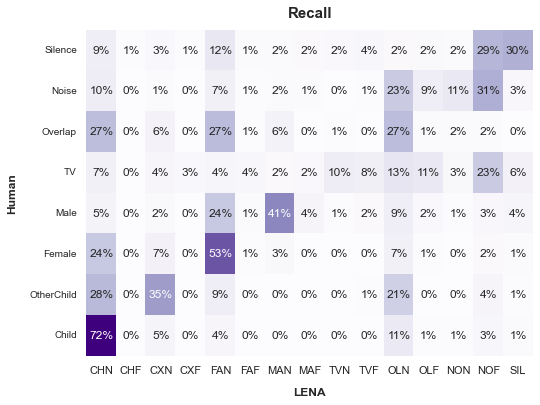

col_0,CHN,CHF,CXN,CXF,FAN,FAF,MAN,MAF,TVN,TVF,OLN,OLF,NON,NOF,SIL
row_0,,,,,,,,,,,,,,,
Silence,0.088558,0.010347,0.027140,0.005715,0.117929,0.011879,0.015855,0.016849,0.023865,0.036114,0.018194,0.020313,0.015399,0.287994,0.303849
Noise,0.097246,0.004477,0.011668,0.001847,0.067434,0.006302,0.015726,0.012154,0.003371,0.006143,0.228977,0.091807,0.114332,0.307566,0.030950
Overlap,0.268392,0.000756,0.058016,0.001703,0.274300,0.005849,0.060276,0.003611,0.007104,0.003237,0.269045,0.012044,0.015508,0.016359,0.003802
TV,0.071803,0.004748,0.038649,0.026951,0.041329,0.036077,0.019112,0.022466,0.096155,0.076901,0.131255,0.114816,0.028776,0.227382,0.063580
Male,0.054423,0.002027,0.019655,0.002450,0.235410,0.014164,0.414113,0.042338,0.007557,0.016961,0.089011,0.023055,0.005863,0.031920,0.041055
Female,0.236669,0.002571,0.065029,0.001205,0.530080,0.005896,0.029246,0.002871,0.004997,0.004115,0.072185,0.009072,0.003270,0.019237,0.013558
OtherChild,0.277946,0.000442,0.354364,0.002084,0.087786,0.002653,0.003410,0.000000,0.000000,0.006126,0.211444,0.003031,0.001516,0.043514,0.005684
Child,0.717084,0.004985,0.047939,0.002615,0.038254,0.002595,0.003598,0.001868,0.004358,0.004668,0.108958,0.007797,0.007712,0.034821,0.012749


In [6]:
plot_confusion(cross_tabulation, 'recall', True)

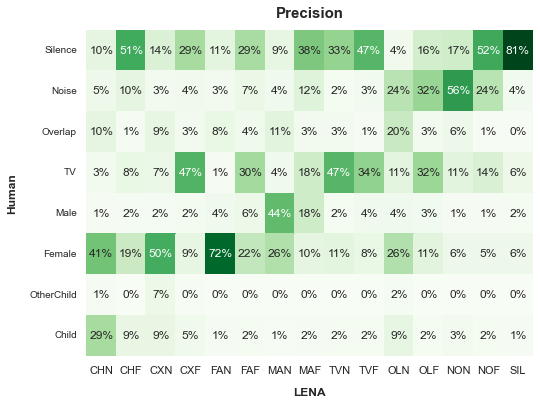

col_0,CHN,CHF,CXN,CXF,FAN,FAF,MAN,MAF,TVN,TVF,OLN,OLF,NON,NOF,SIL
row_0,,,,,,,,,,,,,,,
Silence,0.101425,0.511272,0.138345,0.290773,0.106035,0.286235,0.093605,0.384673,0.334606,0.465299,0.043170,0.162489,0.172324,0.518039,0.813821
Noise,0.048997,0.097308,0.026164,0.041336,0.026674,0.066805,0.040845,0.122077,0.020790,0.034821,0.239009,0.323079,0.562873,0.243386,0.036468
Overlap,0.097498,0.011847,0.093800,0.027478,0.078228,0.044705,0.112873,0.026148,0.031594,0.013227,0.202478,0.030558,0.055045,0.009333,0.003230
TV,0.028426,0.081090,0.068098,0.474002,0.012845,0.300482,0.039003,0.177296,0.466007,0.342481,0.107649,0.317474,0.111314,0.141380,0.058863
Male,0.011309,0.018173,0.018179,0.022622,0.038406,0.061925,0.443605,0.175383,0.019224,0.039650,0.038320,0.033462,0.011905,0.010418,0.019951
Female,0.411047,0.192662,0.502676,0.092976,0.722775,0.215448,0.261836,0.099384,0.106237,0.080409,0.259732,0.110052,0.055488,0.052475,0.055066
OtherChild,0.011733,0.000805,0.066580,0.003909,0.002909,0.002356,0.000742,0.000000,0.000000,0.002909,0.018492,0.000894,0.000625,0.002885,0.000561
Child,0.289564,0.086841,0.086158,0.046903,0.012127,0.022044,0.007490,0.015040,0.021541,0.021204,0.091151,0.021992,0.030427,0.022084,0.012039


In [7]:
plot_confusion(cross_tabulation, 'precision', True)

## Identification Error Rate--Main

In [7]:
with open('mappings/ours_ier.json') as f:
    mappings = json.load(f)
    overlap_classes = mappings['overlap']
    lena_to_ground_mappings = mappings['lena_to_ground_mappings']
    human_to_ground_mappings = mappings['human_to_ground_mappings']
    human_order = mappings['human_order']
    lena_order = mappings['lena_order']

In [8]:
ier = IdentificationErrorRate(collar=0.0, skip_overlap=True)

df = pd.DataFrame(columns=['clip', 'identification error rate', 'missed detection', 'false alarm', 'confusion', 'correct', 'total'])

for i in range(1, 61):
    print('Calculating IER for clip', i)
    human_annot, lena_annot = clip_to_annotations(i, lena_to_ground_mappings, human_to_ground_mappings)
    results = ier(human_annot, lena_annot, detailed=True)
    results['clip'] = i
    df = df.append(results, ignore_index=True)

Calculating IER for clip 1
Calculating IER for clip 2
Calculating IER for clip 3
Calculating IER for clip 4
Calculating IER for clip 5
Calculating IER for clip 6
Calculating IER for clip 7
Calculating IER for clip 8
Calculating IER for clip 9
Calculating IER for clip 10
Calculating IER for clip 11
Calculating IER for clip 12
Calculating IER for clip 13
Calculating IER for clip 14
Calculating IER for clip 15
Calculating IER for clip 16
Calculating IER for clip 17
Calculating IER for clip 18
Calculating IER for clip 19
Calculating IER for clip 20
Calculating IER for clip 21
Calculating IER for clip 22
Calculating IER for clip 23
Calculating IER for clip 24
Calculating IER for clip 25
Calculating IER for clip 26
Calculating IER for clip 27
Calculating IER for clip 28
Calculating IER for clip 29
Calculating IER for clip 30
Calculating IER for clip 31
Calculating IER for clip 32
Calculating IER for clip 33
Calculating IER for clip 34
Calculating IER for clip 35
Calculating IER for clip 36
C

In [9]:
df

,clip,identification error rate,missed detection,false alarm,confusion,correct,total
0,1.0,0.384811,17.077,29.320,35.335,159.983,212.395
1,2.0,0.616669,20.472,24.204,70.371,95.719,186.562
2,3.0,0.764718,13.637,28.840,89.914,69.573,173.124
3,4.0,0.638324,28.946,31.570,34.750,85.548,149.244
4,5.0,0.551757,27.900,17.192,60.042,102.602,190.544
5,6.0,0.761186,20.467,40.993,32.465,70.461,123.393
6,7.0,0.685353,26.574,18.664,62.688,68.213,157.475
7,8.0,0.790519,21.594,31.753,51.449,59.523,132.566
8,9.0,1.041132,40.832,38.667,102.087,31.493,174.412
9,10.0,0.830292,50.524,31.355,64.719,61.319,176.562


### IER calculated manually using sampled frames
(This should be nearly identical to the above)

In [12]:
frame_ier = []
speech_tiers = ['Female', 'Male', 'Child', 'OtherChild']
for i in range(1, 61):
    f_l, f_h = clip_to_frames_single(i, lena_to_ground_mappings, human_to_ground_mappings, overlap_classes)

    false_alarms, misses, confusions, total = calculate_frame_ier(f_h, f_l, speech_tiers, True)
    d = (false_alarms + misses + confusions) / total 
    frame_ier.append(d)

for error in frame_ier:
    print(error)

Testing accuracy of e20190430_134500_031775.cha vs Clip1.TextGrid
Testing accuracy of e20181108_143031_012241.cha vs Clip2.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip3.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip4.TextGrid
Testing accuracy of e20190510_180618_031776.cha vs Clip5.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip6.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip7.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip8.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip9.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip10.TextGrid
Testing accuracy of e20190515_112523_031493.cha vs Clip11.TextGrid
Testing accuracy of e20181206_113635_012242.cha vs Clip12.TextGrid
Testing accuracy of e20181212_125908_012244.cha vs Clip13.TextGrid
Testing accuracy of e20181214_153936_014954.cha vs Clip14.TextGrid
Testing accuracy of e20181220_162750_012244.cha vs Clip15.TextGrid
Test

# IER--Supplementary

## Including TV

In [13]:
with open('mappings/ier_include_tv.json') as f:
    mappings = json.load(f)
    overlap_classes = mappings['overlap']
    lena_to_ground_mappings = mappings['lena_to_ground_mappings']
    human_to_ground_mappings = mappings['human_to_ground_mappings']
    human_order = mappings['human_order']
    lena_order = mappings['lena_order']

ier = IdentificationErrorRate(collar=0.0, skip_overlap=True)

df = pd.DataFrame(columns=['clip', 'identification error rate', 'missed detection', 'false alarm', 'confusion', 'correct', 'total'])

for i in range(1, 61):
    print('Calculating IER for clip', i)
    human_annot, lena_annot = clip_to_annotations(i, lena_to_ground_mappings, human_to_ground_mappings)
    results = ier(human_annot, lena_annot, detailed=True)
    results['clip'] = i
    df = df.append(results, ignore_index=True)

df

Calculating IER for clip 1
Calculating IER for clip 2
Calculating IER for clip 3
Calculating IER for clip 4
Calculating IER for clip 5
Calculating IER for clip 6
Calculating IER for clip 7
Calculating IER for clip 8
Calculating IER for clip 9
Calculating IER for clip 10
Calculating IER for clip 11
Calculating IER for clip 12
Calculating IER for clip 13
Calculating IER for clip 14
Calculating IER for clip 15
Calculating IER for clip 16
Calculating IER for clip 17
Calculating IER for clip 18
Calculating IER for clip 19
Calculating IER for clip 20
Calculating IER for clip 21
Calculating IER for clip 22
Calculating IER for clip 23
Calculating IER for clip 24
Calculating IER for clip 25
Calculating IER for clip 26
Calculating IER for clip 27
Calculating IER for clip 28
Calculating IER for clip 29
Calculating IER for clip 30
Calculating IER for clip 31
Calculating IER for clip 32
Calculating IER for clip 33
Calculating IER for clip 34
Calculating IER for clip 35
Calculating IER for clip 36
C

,clip,identification error rate,missed detection,false alarm,confusion,correct,total
0,1.0,0.384811,17.077,29.320,35.335,159.983,212.395
1,2.0,0.616669,20.472,24.204,70.371,95.719,186.562
2,3.0,0.816454,12.803,37.626,91.678,69.573,174.054
3,4.0,0.692189,25.632,39.609,38.064,85.548,149.244
4,5.0,0.537617,26.680,16.288,57.390,102.602,186.672
5,6.0,0.761186,20.467,40.993,32.465,70.461,123.393
6,7.0,0.687615,27.714,18.664,62.688,68.213,158.615
7,8.0,0.790519,21.594,31.753,51.449,59.523,132.566
8,9.0,1.030927,43.722,37.002,102.913,31.493,178.128
9,10.0,0.802260,54.667,23.668,73.216,61.022,188.905


In [14]:
# Verify with frame-level IER
frame_ier = []
speech_tiers = ['Female', 'Male', 'Child', 'OtherChild', 'TV']
for i in range(1, 61):
    f_l, f_h = clip_to_frames_single(i, lena_to_ground_mappings, human_to_ground_mappings, overlap_classes)

    false_alarms, misses, confusions, total = calculate_frame_ier(f_h, f_l, speech_tiers, True)
    d = (false_alarms + misses + confusions) / total 
    frame_ier.append(d)

for error in frame_ier:
    print(error)

Testing accuracy of e20190430_134500_031775.cha vs Clip1.TextGrid
Testing accuracy of e20181108_143031_012241.cha vs Clip2.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip3.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip4.TextGrid
Testing accuracy of e20190510_180618_031776.cha vs Clip5.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip6.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip7.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip8.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip9.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip10.TextGrid
Testing accuracy of e20190515_112523_031493.cha vs Clip11.TextGrid
Testing accuracy of e20181206_113635_012242.cha vs Clip12.TextGrid
Testing accuracy of e20181212_125908_012244.cha vs Clip13.TextGrid
Testing accuracy of e20181214_153936_014954.cha vs Clip14.TextGrid
Testing accuracy of e20181220_162750_012244.cha vs Clip15.TextGrid
Test

## Including TV and Overlap

In [17]:
with open('mappings/ier_include_tv_overlap.json') as f:
    mappings = json.load(f)
    overlap_classes = mappings['overlap']
    lena_to_ground_mappings = mappings['lena_to_ground_mappings']
    human_to_ground_mappings = mappings['human_to_ground_mappings']
    human_order = mappings['human_order']
    lena_order = mappings['lena_order']

frame_ier = []
speech_tiers = ['Female', 'Male', 'Child', 'OtherChild', 'TV', 'Overlap']

frame_confusions = 0 # need totals
frame_misses = 0
frame_false_alarms = 0
frame_totals = 0

for i in range(1, 61):
    f_l, f_h = clip_to_frames_single(i, lena_to_ground_mappings, human_to_ground_mappings, overlap_classes)

    false_alarms, misses, confusions, total = calculate_frame_ier(f_h, f_l, speech_tiers, skip_overlap=False)
    frame_false_alarms += false_alarms
    frame_misses += misses
    frame_confusions += confusions
    frame_totals += total

print('false alarm:', frame_false_alarms / frame_totals)
print('confusion', frame_confusions / frame_totals)
print('miss', frame_misses / frame_totals)
print('ier', (frame_confusions + frame_false_alarms + frame_misses) / frame_totals)


Testing accuracy of e20190430_134500_031775.cha vs Clip1.TextGrid
Testing accuracy of e20181108_143031_012241.cha vs Clip2.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip3.TextGrid
Testing accuracy of e20190214_153259_012241.cha vs Clip4.TextGrid
Testing accuracy of e20190510_180618_031776.cha vs Clip5.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip6.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip7.TextGrid
Testing accuracy of e20190527_141218_031495.cha vs Clip8.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip9.TextGrid
Testing accuracy of e20190219_164211_012243.cha vs Clip10.TextGrid
Testing accuracy of e20190515_112523_031493.cha vs Clip11.TextGrid
Testing accuracy of e20181206_113635_012242.cha vs Clip12.TextGrid
Testing accuracy of e20181212_125908_012244.cha vs Clip13.TextGrid
Testing accuracy of e20181214_153936_014954.cha vs Clip14.TextGrid
Testing accuracy of e20181220_162750_012244.cha vs Clip15.TextGrid
Test

## Conversational Turn Count, Child Vocalization Count

In [18]:
df = pd.read_csv(METADATA_PATH, index_col='ClipNumber')

vocalization_lena = df['CVC'].values
turn_lena = df['CTC'].values

exclude_from_vocalizations = ('F', 'V')
include_as_turn = ('CA', 'AC', 'CO', 'OC')

turn_human = []
vocalization_human = []

for i in range(1, 61):
    filename = 'Clip{}.TextGrid'.format(i)
    filepath = os.path.join(TEXTGRID_PATH, filename)
    turn = count_conversational_turns(filepath, included=include_as_turn)
    vocalization = count_child_vocalizations(filepath, excluded=exclude_from_vocalizations)
    turn_human.append(turn)
    vocalization_human.append(vocalization)
    
turn_human = np.array(turn_human)
vocalization_human = np.array(vocalization_human)
        


In [19]:
turn_human

array([ 6,  5, 16, 63, 18, 28, 32, 60, 21, 43, 43, 10, 14, 61, 53, 12,  2,
       10, 11, 83,  3, 20, 59, 54, 15, 14,  7,  0, 19,  2,  2,  0,  8,  8,
        0,  1,  0, 10, 19, 24, 36, 16, 46, 19,  4, 29,  2, 60,  0, 11,  2,
       30, 23, 12, 11,  0, 27, 10, 14, 72])

In [20]:
vocalization_human

array([ 17,  14,  37, 135,  40,  52,  72,  89,  59, 109, 142, 177,  37,
       131,  74,  33,   5,  15,  21, 110,  20,  34,  79, 102,  35,  34,
       119,   4,  65,  15,   4,   2,  39,  19,   3,   5,   5,  16,  48,
        67,  79,  30,  65,  46,  50,  34,  52, 189,   2,  14,   2,  83,
        80,  59, 146,  96, 127,  28,  18, 101])

## Adult Word Count

In [21]:
word_counts = []
included = ['Female', 'Male', 'Female2', 'Male2']
for i in range(1, 61):
    count = count_word_whitespace(i, included)
    word_counts.append(count)

In [22]:
word_counts

[343,
 290,
 213,
 317,
 244,
 355,
 511,
 331,
 359,
 295,
 221,
 16,
 272,
 239,
 319,
 163,
 301,
 285,
 372,
 322,
 403,
 233,
 439,
 596,
 329,
 367,
 91,
 189,
 147,
 192,
 573,
 576,
 207,
 427,
 259,
 280,
 686,
 247,
 159,
 414,
 224,
 429,
 208,
 606,
 2,
 226,
 36,
 201,
 549,
 695,
 601,
 129,
 248,
 258,
 29,
 140,
 81,
 266,
 122,
 274]

## Morpheme Count

In [2]:
morph_counts = []
included = ['Female', 'Male', 'Female2', 'Male2']
for i in range(1, 61):
    count = count_morphemes_mecab(i, included)
    morph_counts.append(count)

In [3]:
morph_counts

[595,
 496,
 353,
 531,
 433,
 566,
 920,
 550,
 678,
 499,
 386,
 28,
 400,
 505,
 581,
 248,
 543,
 506,
 690,
 560,
 730,
 399,
 749,
 1031,
 558,
 624,
 165,
 320,
 223,
 327,
 1027,
 969,
 334,
 808,
 404,
 463,
 1190,
 420,
 258,
 804,
 354,
 776,
 363,
 1014,
 2,
 362,
 77,
 348,
 942,
 1198,
 1024,
 225,
 422,
 424,
 43,
 240,
 120,
 453,
 183,
 420]

In [ ]:
def plot_all_clip_comparisons():
    for i in range(1, 61):
        human_annot, lena_annot = clip_to_annotations(i, raw_lena_mappings, raw_textgrid_mappings)
        # Plot ground truth and lena side by side
        # create a figure with 6 rows with matplotlib
        nrows = 2
        fig, ax = plt.subplots(nrows=nrows, ncols=1)
        fig.set_figwidth(20)
        fig.set_figheight(nrows * 2)
        # 1st row: reference annotation
        pyannote.core.notebook.plot_annotation(human_annot, ax=ax[1], time=True, legend=True)

        # 2nd row: SAD raw scores
        pyannote.core.notebook.plot_annotation(lena_annot, ax=ax[0], time=False, legend=True)

        ax[0].set_title('Clip {}'.format(i), loc='right')

        fig.savefig('/data/speech/ko_results/raw_vis_{}'.format(i), transparent=False, bbox_inches='tight')
#         plt.show()
        fig.clear()
                   
plot_all_clip_comparisons()